In [2]:
import matplotlib.pyplot as plt
import math
import numpy
import random

def draw_my_function(f,start,end,number_of_points):
    x_values = numpy.linspace(start,end,number_of_points)
    y_values = f(x_values)
    
    plt.figure(figsize=(15,5))
    plt.plot(x_values,y_values)
    plt.show()
    
def draw_my_function_with_gradient(f,start,end,number_of_points):
    x_values = numpy.linspace(start,end,number_of_points)
    y_values = f(x_values)
    df_dx_values = numpy.gradient(y_values,x_values)
    
    plt.figure(figsize=(15,5)) 
    plt.plot(x_values,y_values)
    plt.plot(x_values,df_dx_values)
    plt.show()
    
f = lambda x_values : numpy.exp(-(x_values/10))*numpy.sin(x_values)

## Question 1)

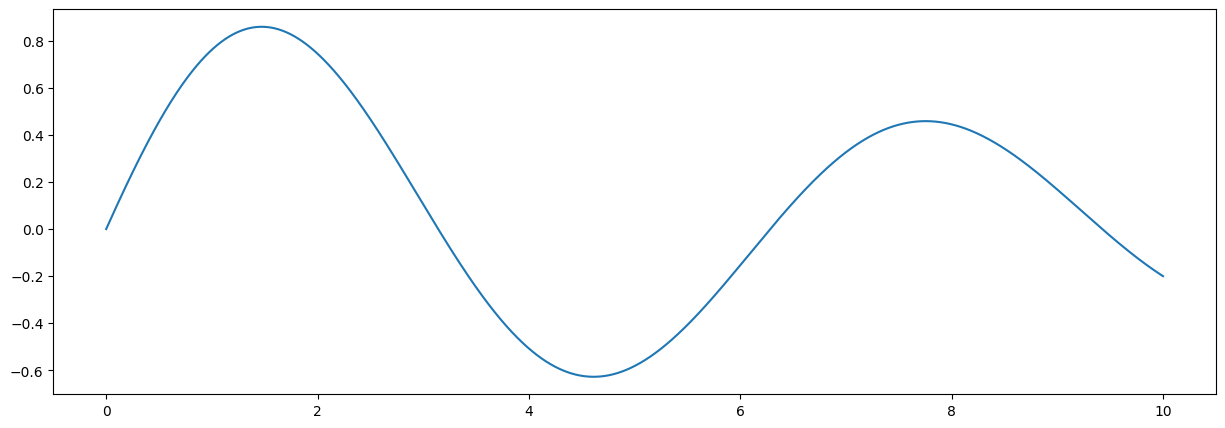

In [3]:
start,end=0,10
number_of_points = 10000

draw_my_function(f,start,end,number_of_points)


    


## Question 2)

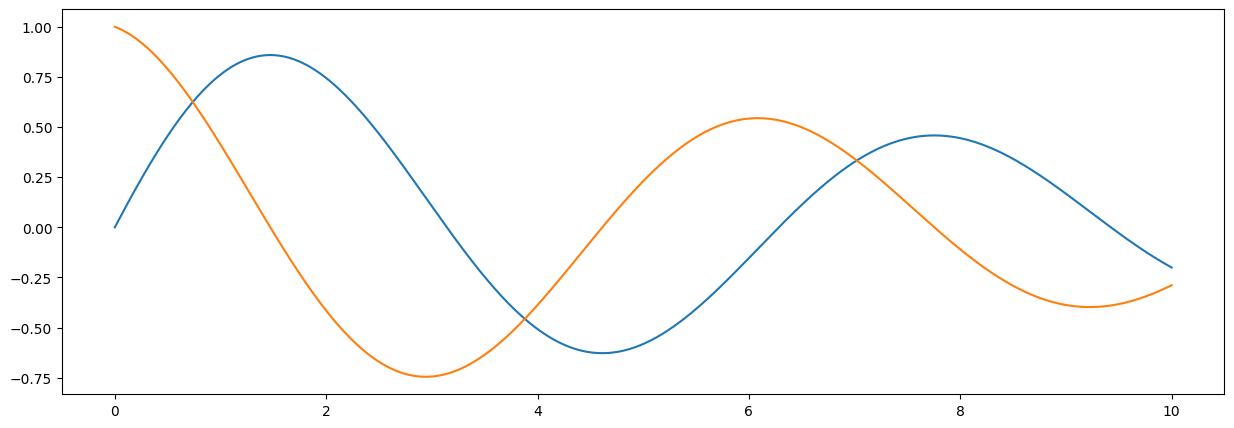

In [4]:
start,end=0,10
number_of_points = 10000

draw_my_function_with_gradient(f,start,end,number_of_points)

## Question 3)

La moyenne de la fonction f(x) sur l'intervale [3,7] est   : -0.2795672812096891
L'écart type de la fonction f(x) sur l'intervale [3,7]est : 0.2808959902656519


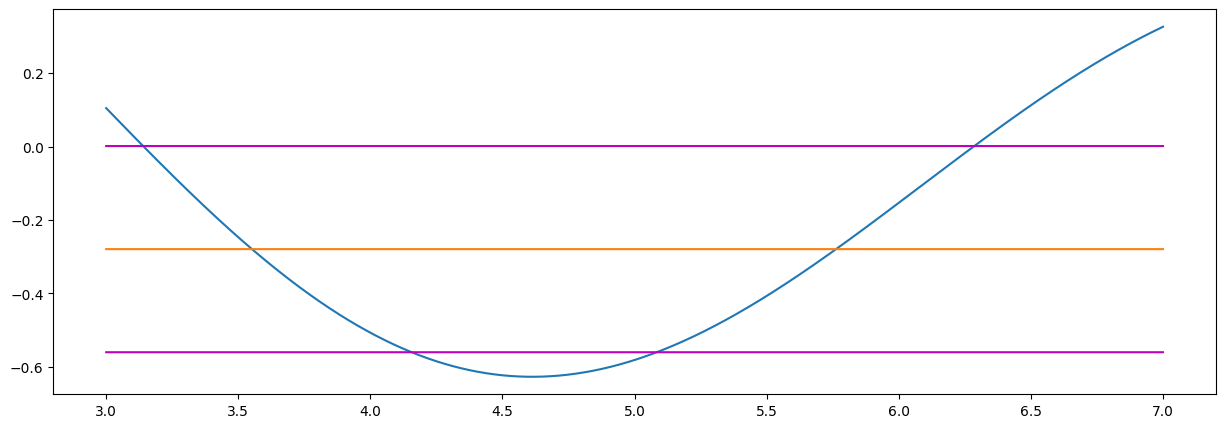

legende:
magenta : écart type
orange  : moyenne


In [5]:
start,end=0,10
number_of_points = 10000
steps = (end-start)/number_of_points
variance = 0

x_values_10 = []
y_values_10 = []

for index_step in range (0,number_of_points):
    x_values_10.append(start+index_step*steps)
    y_values_10.append(f(start+index_step*steps))


#slicing sur l'intervalle [3,7]   
index_a = x_values_10.index(3)
index_b = x_values_10.index(7)+1
x_values = x_values_10[index_a:index_b]
y_values = y_values_10[index_a:index_b] 

# calcul de la moyenne et de sa droite
mean = sum(y_values)/len(y_values)
ligne_mean = [mean]*len(y_values)

# calcul de la variance
for i in range(0,len(y_values)):
    variance = variance + (f(i)-mean)**2
variance = variance/len(y_values)

# calcul de l'ecart type et de ses droites
ecart_type = math.sqrt(variance)
ecart_type_top = [mean + ecart_type]*len(x_values)
ecart_type_bot = [mean - ecart_type]*len(x_values)

print("La moyenne de la fonction f(x) sur l'intervale [3,7] est   :",mean)
print("L'écart type de la fonction f(x) sur l'intervale [3,7]est :",ecart_type)

plt.figure(figsize=(15,5)) 
plt.plot(x_values,y_values)
plt.plot(x_values,ligne_mean)
plt.plot(x_values,ecart_type_top,"m")
plt.plot(x_values,ecart_type_bot,"m")
plt.show()

print("legende:")
print("magenta : écart type")
print("orange  : moyenne")

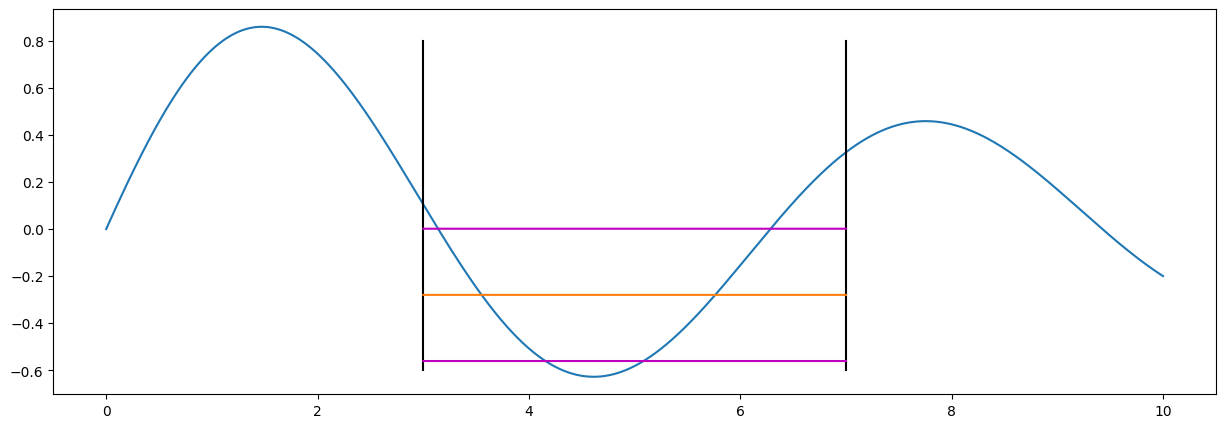

legende:
magenta : écart type
orange  : moyenne


In [6]:
plt.figure(figsize=(15,5)) 
plt.plot(x_values_10,y_values_10)
plt.plot([3,3],[-0.6,0.8],"k")
plt.plot([7,7],[-0.6,0.8],"k")
plt.plot(x_values,ligne_mean)
plt.plot(x_values,ecart_type_top,"m")
plt.plot(x_values,ecart_type_bot,"m")
plt.show()

print("legende:")
print("magenta : écart type")
print("orange  : moyenne")

## Question 4)

les endroit ou x fait que f'(x)=0 sont x= [1.4701, 4.6125, 7.7538]


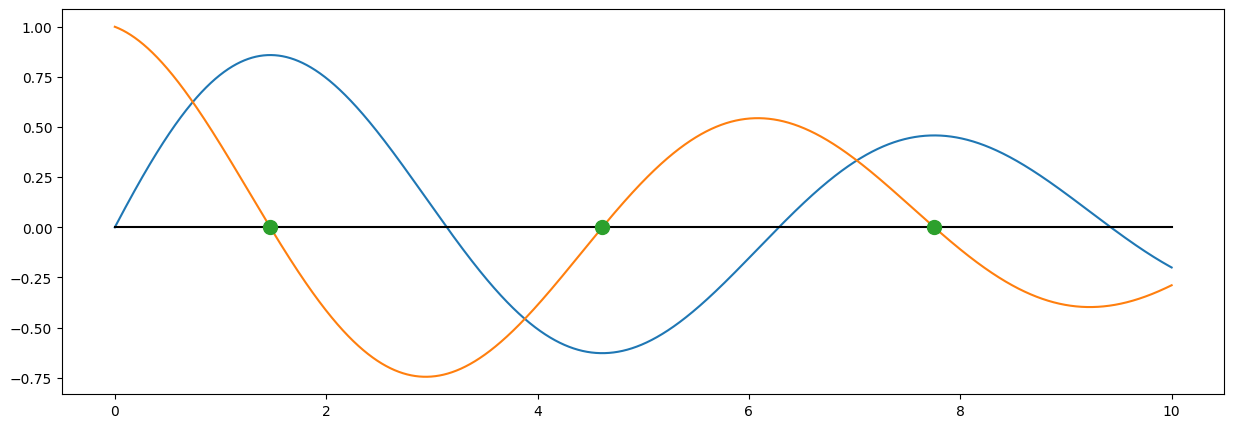

In [75]:
start,end=0,10
number_of_points = 10000

x_values = numpy.linspace(start,end,number_of_points)
y_values = f(x_values)
df_dx_values = numpy.gradient(y_values,x_values)

index_gradient_0 = []
n1 = 0
n2 = 0

for i in range (1,number_of_points-1):
    n1=df_dx_values[i]
    n2=df_dx_values[i+1]
    
    if n1 > 0 and n2 < 0:
        index_gradient_0.append(i)
        
    elif n1 < 0 and n2 > 0:
        index_gradient_0.append(i)
        
    elif n1==0:
        index_gradient_0.append(i)   

x_values_gradient_0 = []
y_values_gradient_0 = []
for i in range (0,len(index_gradient_0)): 
    x_values_gradient_0.append(x_values[index_gradient_0[i]])

y_values_gradient_0 = [0]*len(x_values_gradient_0)


for i in range(0,len(x_values_gradient_0)):
    x_values_gradient_0[i] = round(x_values_gradient_0[i],4)


print("les endroit ou x fait que f'(x)=0 sont x=",x_values_gradient_0)

plt.figure(figsize=(15,5)) 
plt.plot(x_values,y_values)
plt.plot(x_values,df_dx_values)
plt.plot([0,10],[0,0],"k")
plt.plot(x_values_gradient_0,y_values_gradient_0,".",markersize=20)
plt.show()

## Question 5)

Sur l'intervale [ 3.0 , 7.0 ] l'intégrale de f(x) prends environ 30.4802 % de la zone


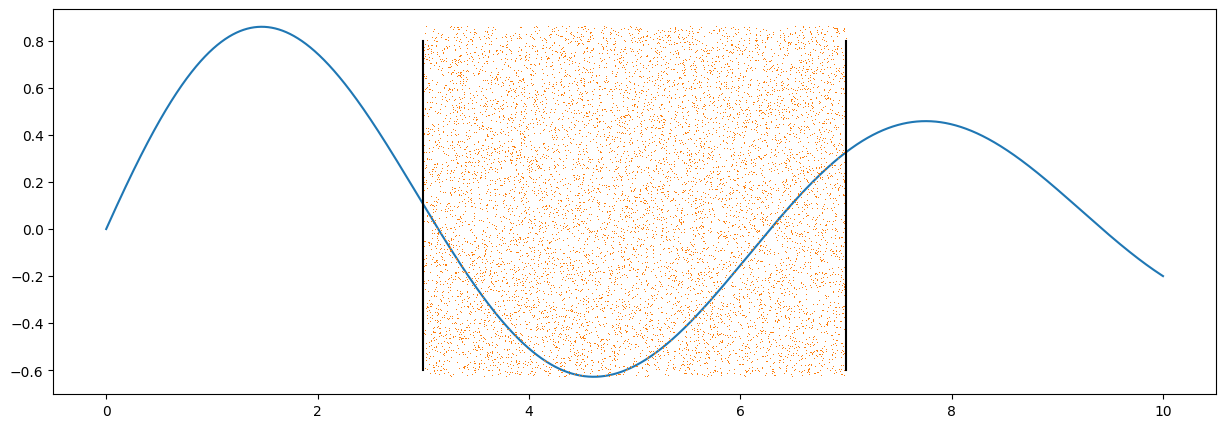

In [8]:
start,end=0,10
number_of_steps = 10000
steps = (end-start)/number_of_steps

x_values = []
y_values = []

#courbe de f(x)
for index_step in range (0,number_of_steps):
    x_values.append(start+index_step*steps)
    y_values.append(f(start+index_step*steps))

#set de l'intervalle ciblé
a,b = 3.0,7.0

#set du nombre de point de la méthode Monte Carlo
number_of_random_points = 10000

#set des coordoonnées des points
x_random_points = []
y_random_points = []
for i in range (0,number_of_random_points):
    x_random_points.append(random.uniform(a, b))
    y_random_points.append(random.uniform(min(y_values), max(y_values)))

in_area  = 0
out_area = 0

#boucle qui permet de voir si les points sont dedans ou en-dehors de la courbe
for i in range(0,number_of_random_points):
    
    if y_random_points[i] <= f(x_random_points[i]):
        in_area = in_area + 1
    else:
        out_area = out_area +1

#résultat en pourcentage
result = round(in_area/out_area*100,4)

print("Sur l'intervale [",a,",",b,"] l'intégrale de f(x) prends environ",result,"% de la zone")

#affichage de la courbe avec les points
plt.figure(figsize=(15,5)) 
plt.plot(x_values,y_values)
plt.plot(x_random_points,y_random_points,",")
plt.plot([3,3],[-0.6,0.8],"k")
plt.plot([7,7],[-0.6,0.8],"k")
plt.show()